<a href="https://colab.research.google.com/github/Ope-Ai/Ope-Ai/blob/main/Practice_analysis_on_adult_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the adult census dataset

In [2]:
import pandas as pd

adult_census = pd.read_csv("adult-census.csv")

Inspect Dataframe

In [3]:
adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Value count for our target column (Dependent Variable)

In [4]:
target_column = 'class'
adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

Checking for categorical and numerical data

In [5]:
numerical_columns = [
    'age', 'education-num', 'capital-gain', 'capital-loss',
    'hours-per-week']
categorical_columns = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'native-country']
all_columns = numerical_columns + categorical_columns + [
    target_column]

adult_census = adult_census[all_columns]

check for the number of samples(rows) and columns available in the dataset

In [6]:
print(f"The dataset contains {adult_census.shape[0]} samples and "
      f"{adult_census.shape[1]} columns")

The dataset contains 48842 samples and 14 columns


Compute for the number of features by counting the number of columns and subtract 1, since one of the columns is the target

In [7]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


Plotting data on histograms

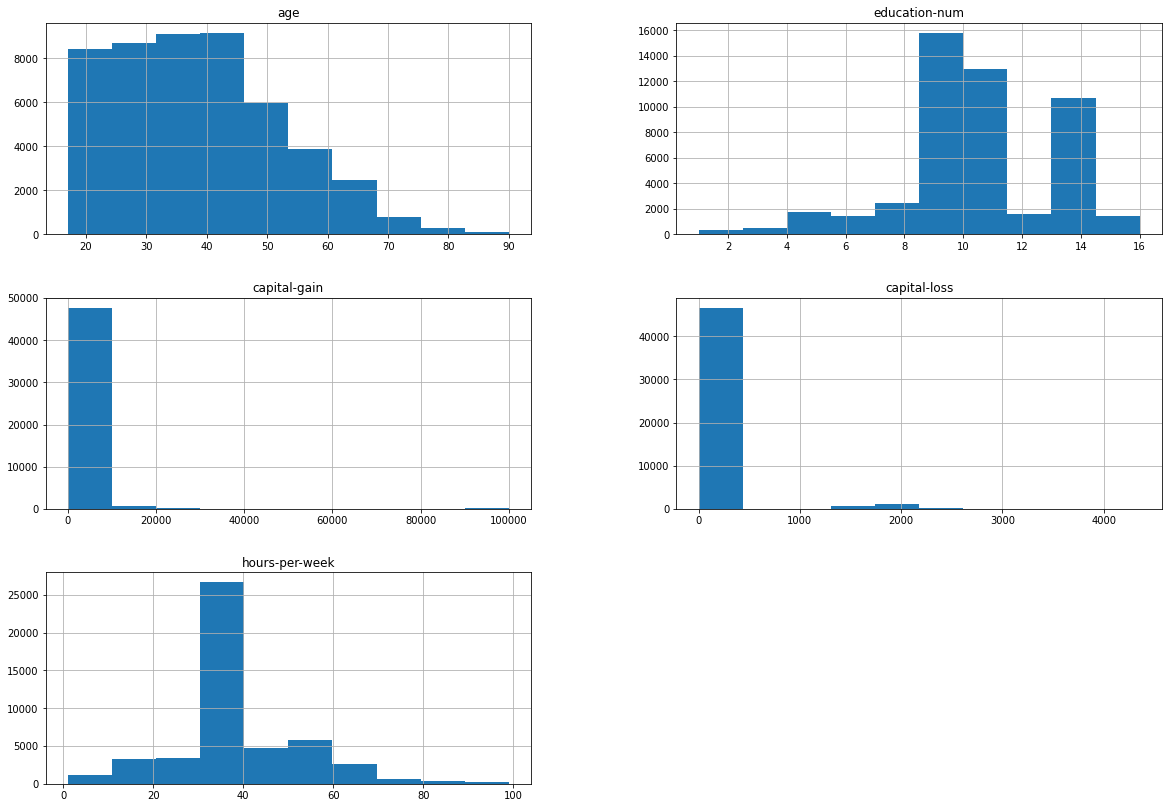

In [8]:
Histogram = adult_census.hist(figsize=(20, 14))

Relationship between education and education-num

In [9]:
pd.crosstab(index=adult_census['education'],
            columns=adult_census['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


Pairplot: We will plot a subset of the data to keep the plot readable

In [11]:
import seaborn as sns

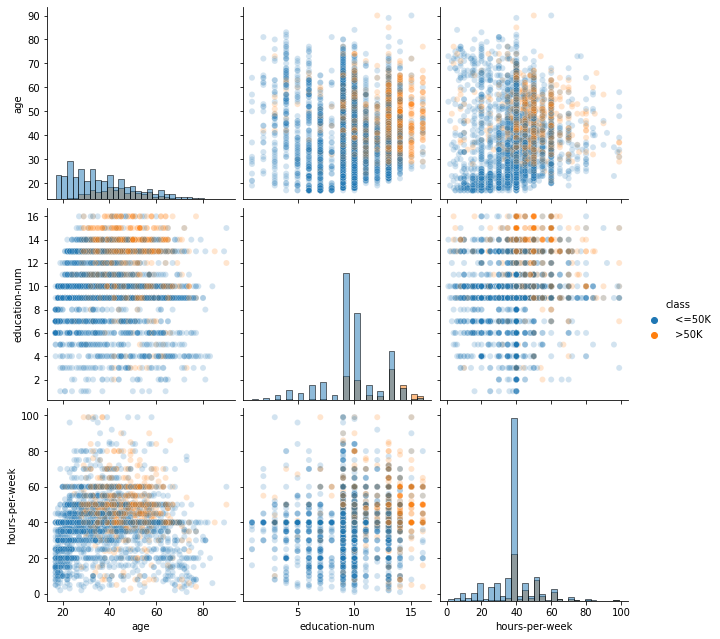

In [12]:
n_samples_to_plot = 5000
columns = ['age', 'education-num', 'hours-per-week']
_ = sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})

Predicting whether someone has a high or low income by focusing on the combination of the hours-per-week and age features.

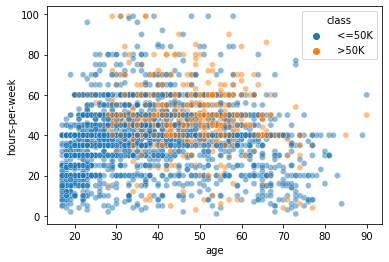

In [13]:
_ = sns.scatterplot(
    x="age", y="hours-per-week", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,
)

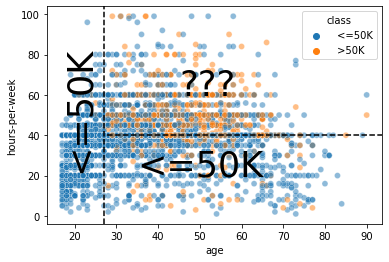

In [14]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age", y="hours-per-week", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

Showing features distribution for each class

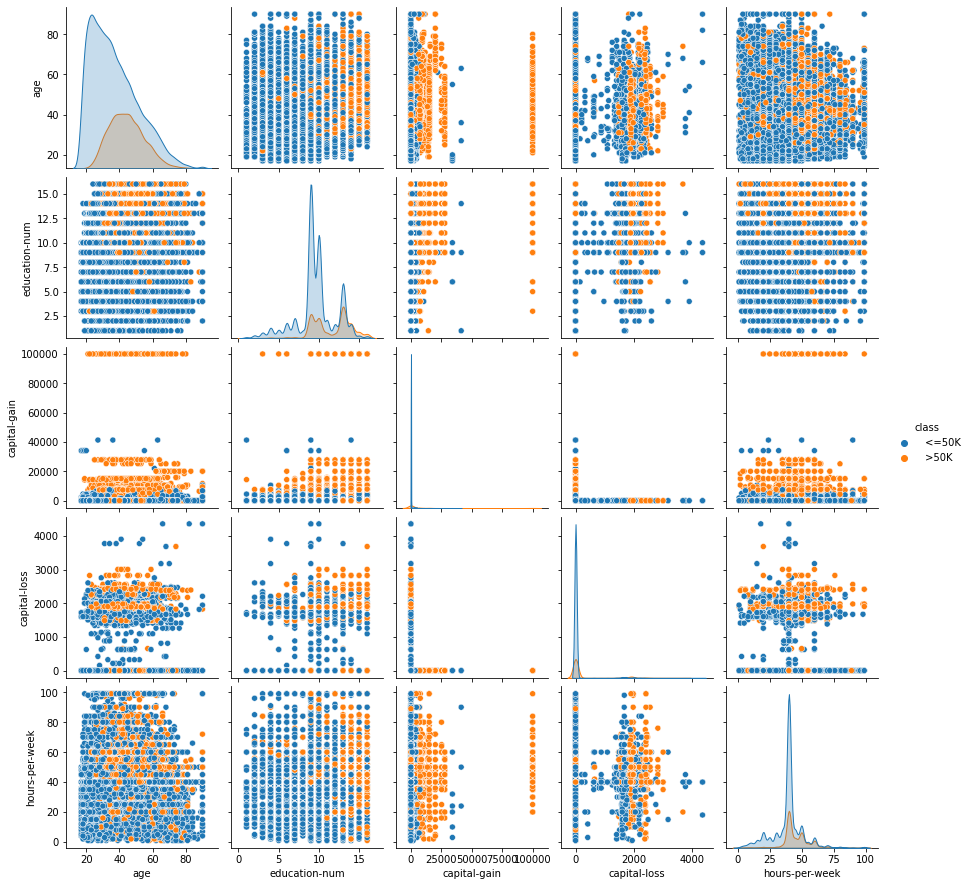

In [18]:
import seaborn

pairplot_figure = seaborn.pairplot(adult_census, hue="class")

Seperating the dependent variable/target from our data

In [19]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [20]:
data = adult_census.drop(columns=[target_name, ])
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,25,7,0,0,40,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,38,9,0,0,50,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,28,12,0,0,40,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,44,10,7688,0,40,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,18,10,0,0,30,?,Some-college,Never-married,?,Own-child,White,Female,United-States


Checking for columns

In [21]:
data.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country'],
      dtype='object')